## Pre Processing Data

In [172]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [142]:
DATA_PATH ="../data/spotify_songs.csv"
OUTPUT_PATH= "../data/processed_spotify_songs.csv"

In [143]:
df = pd.read_csv(DATA_PATH)
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Assessing the data

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [145]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


# Dealing with empty values

We will start by checking for empty entries in the dataset and handling these cases.

In [146]:
print("Number of empty cells in each column:")
print(df.isna().sum())
print('\n')
nan_rows = df[df.isna().any(axis=1)]
print("The rows with empty values are:")
print(nan_rows)

Number of empty cells in each column:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


The rows with empty values are:
                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   


From the table above, we can see that there are 5 rows containing empty values out of the dataset of 32833 observations. We chose to drop these 5 rows to simplify our analysis given the large number of other observations. Before dropping these observations, we looked more closely at the data to ensure that there is no underlying pattern correlated with these missing values. These rows are missing values in the `track_name`, `track_artist` and `track_album_name` columns, and the `track_popularity` is 0 for all 5 of these rows, therefore we have reason to believe that dropping them will not affect the overall analysis.

Furthermore, these 5 rows have empty values for all 3 columns where there are empty values, and not sparse empty values throughout multiple rows and columns, which would have required more effort to deal with.

In [147]:
df = df.dropna()
print("Number of empty cells in each column:")
print(df.isna().sum())

Number of empty cells in each column:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


# Dealing with Duplicate Data

We will also check for duplicate entries in the dataset and handle these cases as duplicates will affect the importance of different song features in predicting its popularity.

In [148]:
print("Number of duplicates in the dataset:")
print(df.duplicated().sum())

Number of duplicates in the dataset:
0


We thus notice that there are no duplicate rows in the dataset. 

Despite there being no duplicate rows, there are 4476 duplicates of the `track_id` feature, which should be unique to each song, which we can see in the following two code chunks:

In [149]:
# subtracting dataframe without duplicated track_id from full dataframe
df_duplicated_track_id = df.drop_duplicates(subset=['track_id'])
print(f"Number of duplicated track ids: {len(df)} - {len(df_duplicated_track_id)} = {len(df) - len(df_duplicated_track_id)}")

Number of duplicated track ids: 32828 - 28352 = 4476


In [150]:
# including `track_name`, `track_artist` and `track_popularity` to ensure `track_id` is unique to each song
df_duplicated_track_id = df.drop_duplicates(subset=['track_id', 'track_name', 'track_artist', 'track_popularity'])
print(f"Number of duplicated track ids: {len(df)} - {len(df_duplicated_track_id)} = {len(df) - len(df_duplicated_track_id)}")

Number of duplicated track ids: 32828 - 28352 = 4476


When inspecting the data further, we notice that the duplicates with the same `track_ids` are either the same song listed under a different playlist, or the same songs listed under a different genre. 

In order to remove duplicates in a more delicate matter, we decided to remove duplicates based on the track_id uniquely of songs that have the same track_name and track_artist as well as genre as we established that these three features are the important to identify a song. Therefore, if the playlist names are different for example then that is fine.

To deal with the duplicates in the case where the track_id, track_name, track_artist and genre are the same, instead of randomly dropping one of the duplicates, we will save an additional entity with the same features and the varying features averaged out (ex. track_popularity), then remove both duplicate entries. This way, we can keep the data as accurate as possible.

Where there are duplicate entries with different genres, we want to ensure that both listed genres are captures. Therefore, we will consolidate both entries into one resulting in one entry with a list of multiple genres. This approach allows us to capture all the information available as opposed to selecting one genre, as we cannot reasonably determine which genre may be more dominant for each song, or even whether having multiple genres will affect our prediction.

In [151]:
grouped = df.groupby(['track_id', 'track_name', 'track_artist'])
processed_songs = []
features_to_average = ['track_popularity', 'key', 'loudness', 'danceability', 'energy', 'speechiness',
                           'acousticness', 'instrumentalness', 'liveness', 'valence']

for key, group in grouped:
    # If only one song in the group, no duplicates, so add it as-is
    if len(group) == 1:
        processed_songs.append(group)
    else:
        # Handle duplicates based on genre and subgenre of the playlist with the track
        unique_genres = group['playlist_genre'].unique()
        unique_subgenres = group['playlist_subgenre'].unique()
        
        if len(unique_genres) > 1:
            # Combine genres into a list
            combined_genre = ', '.join(unique_genres)
            group['playlist_genre'] = combined_genre

        if len(unique_subgenres) > 1:
            # Combine subgenres into a list
            combined_subgenre = ', '.join(unique_subgenres)
            group['playlist_subgenre'] = combined_subgenre
        

        new_song = group.iloc[0].copy()
        avg_features = group[features_to_average].mean()
        for feature in features_to_average:
                new_song[feature] = avg_features[feature]
        
        processed_songs.append(pd.DataFrame([new_song]))

final_df = pd.concat(processed_songs, ignore_index=True)
final_df = final_df.drop_duplicates(subset=['track_id', 'track_name', 'track_artist', 'playlist_genre', 'playlist_subgenre'], keep='first')

print(f"Count of original rows - count after handling duplicates = {len(df)} - {len(final_df)} = {len(df) - len(final_df)}")

Count of original rows - count after handling duplicates = 32828 - 28352 = 4476


In [152]:
df = final_df
print(df['playlist_genre'].value_counts())

playlist_genre
rap                           4994
edm                           4877
r&b                           4449
rock                          4264
pop                           4102
latin                         3980
pop, edm                       274
pop, r&b                       217
pop, latin                     180
rap, r&b                       147
rap, latin                     147
pop, rock                      107
latin, edm                      93
rap, edm                        61
r&b, edm                        55
latin, r&b                      45
pop, latin, edm                 43
pop, latin, r&b, edm            42
pop, latin, r&b                 39
rock, r&b                       35
pop, rap                        33
pop, r&b, edm                   27
rap, rock                       22
latin, r&b, edm                 18
pop, rap, r&b                   12
pop, rap, edm                   11
pop, rap, latin                 11
rap, latin, r&b                 10
rap, 

In [153]:
print(df['playlist_subgenre'].value_counts())

playlist_subgenre
neo soul                                               1478
progressive electro house                              1460
indie poptimism                                        1419
southern hip hop                                       1413
gangster rap                                           1249
                                                       ... 
electropop, classic rock, permanent wave                  1
post-teen pop, hip hop                                    1
hip hop, urban contemporary, hip pop, pop edm             1
dance pop, tropical, hip pop, big room, pop edm           1
hip hop, southern hip hop, trap, latin pop, hip pop       1
Name: count, Length: 553, dtype: int64


As we can see from the output above, there are significant differences between the counts of some genres and subgenres, and others. We decided to  investigate this imbalance in the data further.

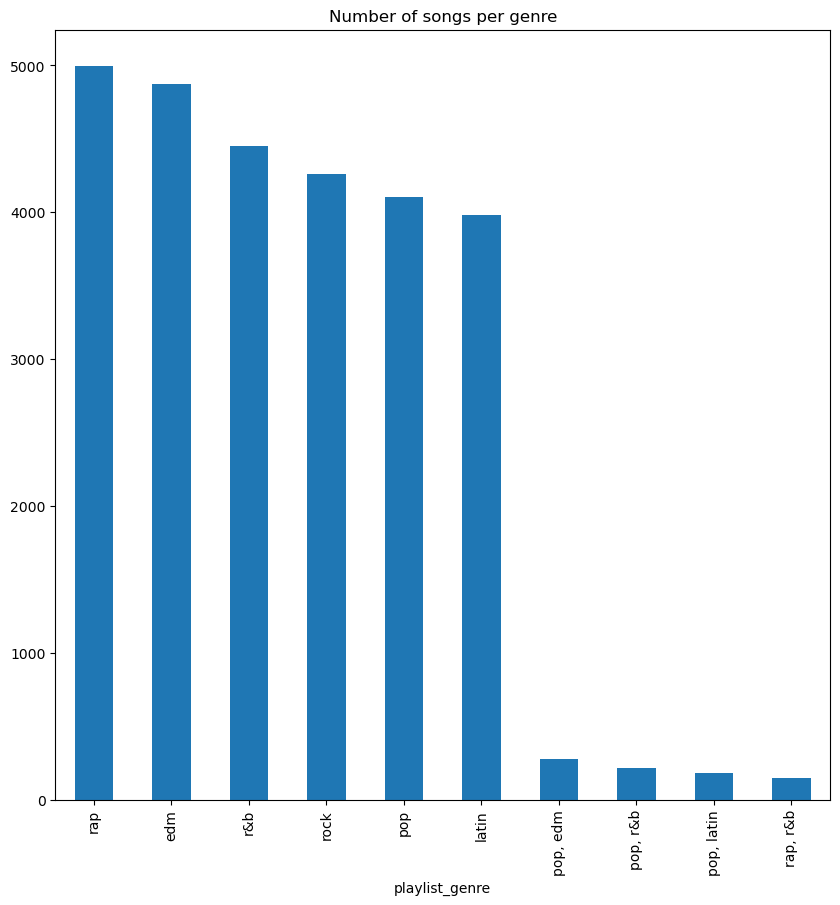

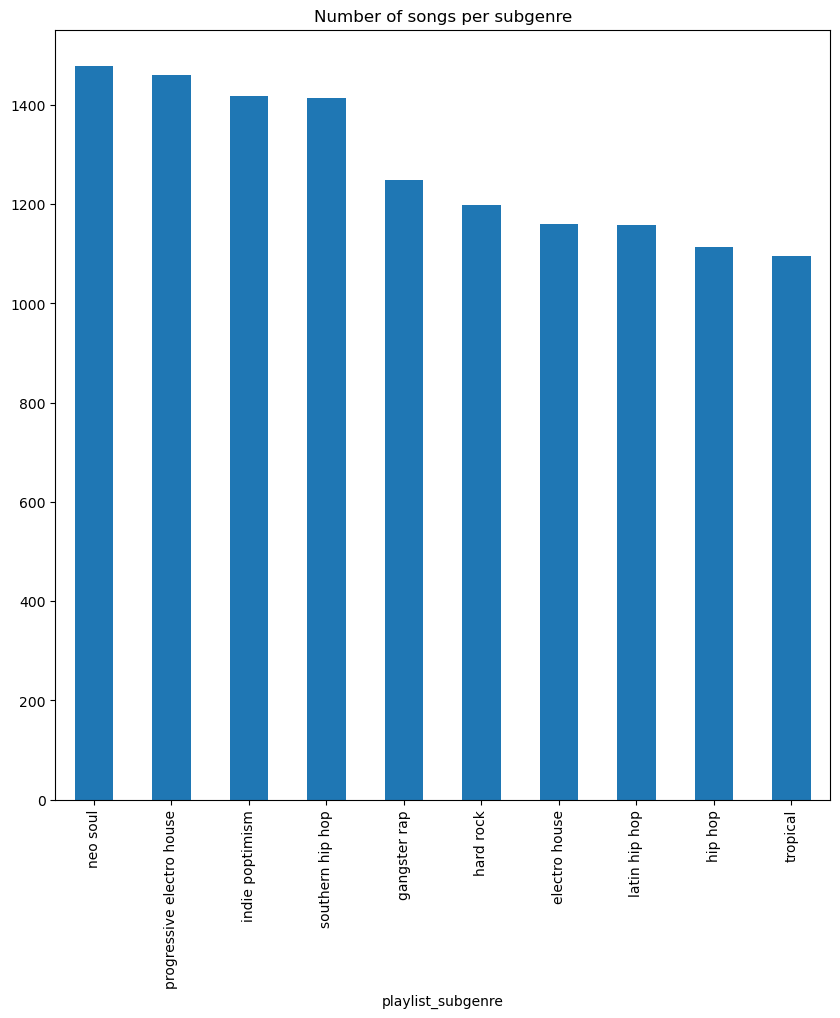

In [154]:
fig = plt.figure(figsize=(10, 10))
# playlist_genre_normalized = df['playlist_genre'].value_counts(normalize=True)
# ten_first_genres = playlist_genre_normalized.head(10)
ten_first_genres = df['playlist_genre'].value_counts().head(10)
ten_first_genres.plot(kind='bar')
plt.title('Number of songs per genre')
plt.show()

fig = plt.figure(figsize=(10, 10))
# playlist_subgenre_normalized = df['playlist_subgenre'].value_counts(normalize=True)
# ten_first_subgenres = playlist_subgenre_normalized.head(10)
ten_first_subgenres = df['playlist_subgenre'].value_counts().head(10)
ten_first_subgenres.plot(kind='bar')
plt.title('Number of songs per subgenre')
plt.show()

In [155]:
unique_values = df["playlist_genre"].unique()

# Display the unique values
print(unique_values)

['rock' 'r&b' 'pop' 'latin' 'edm' 'rap, r&b, edm' 'rap' 'pop, rock'
 'pop, latin' 'pop, r&b' 'pop, rap, r&b' 'pop, edm' 'rap, r&b'
 'pop, latin, edm' 'pop, rock, latin' 'latin, r&b' 'pop, latin, r&b'
 'rock, r&b' 'rap, latin' 'r&b, edm' 'pop, latin, r&b, edm' 'rap, edm'
 'latin, edm' 'pop, rap' 'latin, r&b, edm' 'pop, rap, edm' 'pop, r&b, edm'
 'pop, rock, r&b' 'rap, rock' 'rap, latin, r&b' 'pop, rap, latin'
 'rap, latin, r&b, edm' 'pop, rap, rock' 'pop, rap, latin, edm'
 'pop, rock, edm' 'pop, rock, latin, r&b, edm' 'pop, rap, latin, r&b'
 'rock, latin' 'rock, latin, r&b' 'pop, rock, latin, r&b'
 'pop, rap, latin, r&b, edm' 'rock, edm' 'pop, rap, r&b, edm'
 'rap, latin, edm']


It appears that there are big differences between the count of songs in different genres and subgenres. Given the number of potential subgenres, it hard to combine subgenres and level out this imbalance. That said, we note that there are only six listed genres, with additional groups containing songs that may fall in to two or more of these orignal genres. 

To account for this imbalance, we will use one hot encoding. This will allow us to encode a song's membership in multiple groups without creating new groups for each combination. For example, for a Latin pop song, it will have membership = 1 for both latin and pop genres, but 0 for the remaining genres. This encoding will be carried out below in the portion of the notebook where we deal with categorical variables.

### Selecting columns for analysis

In [156]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

Now that we have dealt with empty values, we can take a look at the columns in our dataframe in conjunction with our objective, which is to predict a song's popularity. Not all these columns are necessary for prediction, in particular `track_id` which is a unique identifier for each song and `track_name`. We do not want the model to assign importance to a song's identifier or name for prediction, so we will drop these columns.

Furthermore, the `track_album_name` and `track_album_id` columns contain the same information, and it is not necessary to keep both. So, we will delete `track_album_name` as several albums could contain the same name, but `track_album_id` is a unique identifier. We will however still maintain this information, as a popular album could potential increase the popularity of a song that would not be as popular otherwise. Similarly, for `playlist_name` and `playlist_id`, we will drop `playlist_name`.

In [157]:
## Drop columns as specified above

df = df.drop(
    ["track_id", "track_name", "track_album_name", "playlist_name"],
    axis=1,
    )

### Normalizing the data

We next normalize the data for the continuous variables. As features are measured differently, normalizing the data ensures that the model does not assign unwarranted importance or unimportance to certain variables. More concretely, normalizing the data ensures that for variables with big values, a small change does not change the prediction drastically, and conversely for variables with small values, a change in the variable will affect the prediction appropriately.

In [158]:
scaler = MinMaxScaler()

columns_to_normalize = ["key", "loudness", "danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000
mean,39.335320,0.664675,0.698320,0.487947,0.830422,0.565533,0.117581,0.178262,0.091680,0.191722,0.515021,120.958219,226574.631102
std,23.699443,0.148312,0.183540,0.328522,0.063626,0.495696,0.111707,0.224159,0.233966,0.156514,0.236472,26.954502,61081.363704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.570702,0.578926,0.181818,0.799148,0.000000,0.044662,0.014386,0.000000,0.092972,0.331988,99.972000,187741.250000
50%,42.000000,0.681587,0.721951,0.545455,0.842089,1.000000,0.068192,0.080181,0.000021,0.127510,0.516650,121.993500,216933.000000
75%,58.000000,0.773143,0.842973,0.818182,0.874615,1.000000,0.144880,0.261569,0.006612,0.250000,0.701312,133.999000,254975.250000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,239.440000,517810.000000


### Standardizing features

Similarly to normalizing the data, standardizing the data will make it more consistent and therefore better for our analysis.

In [174]:
standard_scaler = StandardScaler()

columns_to_scale = columns_to_normalize
df[columns_to_scale] = standard_scaler.fit_transform(df[columns_to_scale])
df.describe()

,track_popularity,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,latin,pop,rap,r&b,artist_track_encoded,playlist_id_encoded,track_album_id_encoded,release_year,release_month,release_day
count,28352.000000,26671,2.835200e+04,2.835200e+04,2.835200e+04,2.835200e+04,28352.000000,2.835200e+04,2.835200e+04,2.835200e+04,...,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,26671.000000,26671.000000,26671.000000
mean,39.335320,2012-08-03 10:30:53.248847360,6.415736e-16,6.265367e-17,-2.080102e-17,-8.896821e-17,0.565533,2.506147e-18,-5.613769e-17,5.212785e-17,...,0.163622,0.181010,0.193390,0.181222,39.335320,39.335320,39.335320,2012.103146,6.418057,14.198268
min,0.000000,1957-01-01 00:00:00,-4.481675e+00,-3.804786e+00,-1.485305e+00,-1.305180e+01,0.000000,-1.052599e+00,-7.952591e-01,-3.918564e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.548387,0.000000,1957.000000,1.000000,1.000000
25%,21.000000,2010-04-24 00:00:00,-6.336261e-01,-6.505135e-01,-9.318527e-01,-4.915306e-01,0.000000,-6.527764e-01,-7.310790e-01,-3.918564e-01,...,0.000000,0.000000,0.000000,0.000000,28.000000,28.983051,21.888889,2010.000000,3.000000,6.000000
50%,42.000000,2016-11-11 00:00:00,1.140340e-01,1.287566e-01,1.750524e-01,1.833686e-01,1.000000,-4.421380e-01,-4.375560e-01,-3.917676e-01,...,0.000000,0.000000,0.000000,0.000000,40.666667,38.696970,43.000000,2016.000000,7.000000,14.000000
75%,58.000000,2019-04-13 00:00:00,7.313681e-01,7.881390e-01,1.005231e+00,6.945860e-01,1.000000,2.443868e-01,3.716521e-01,-3.635947e-01,...,0.000000,0.000000,0.000000,0.000000,52.000000,50.740260,58.000000,2019.000000,10.000000,22.000000
max,100.000000,2020-01-29 00:00:00,2.260985e+00,1.643701e+00,1.558684e+00,2.665272e+00,1.000000,7.899529e+00,3.665932e+00,3.882341e+00,...,1.000000,1.000000,1.000000,1.000000,97.000000,79.195652,100.000000,2020.000000,12.000000,31.000000
std,23.699443,NaN,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,0.495696,1.000018e+00,1.000018e+00,1.000018e+00,...,0.369938,0.385033,0.394963,0.385209,17.499857,14.908984,23.415735,10.246982,3.735432,9.434473


### Correcting skewness

We also need to deal with the positive and nagetive skewness of values + there's some stuff about that in these notebooks from kaggle using this dataset: https://www.kaggle.com/code/harshitarya003/spotifysongs-eda-data-analysis-step-by-step and like step by step explanation which might be useful. (careful that there's also EDA in there which is not yet exactly what we want to do)

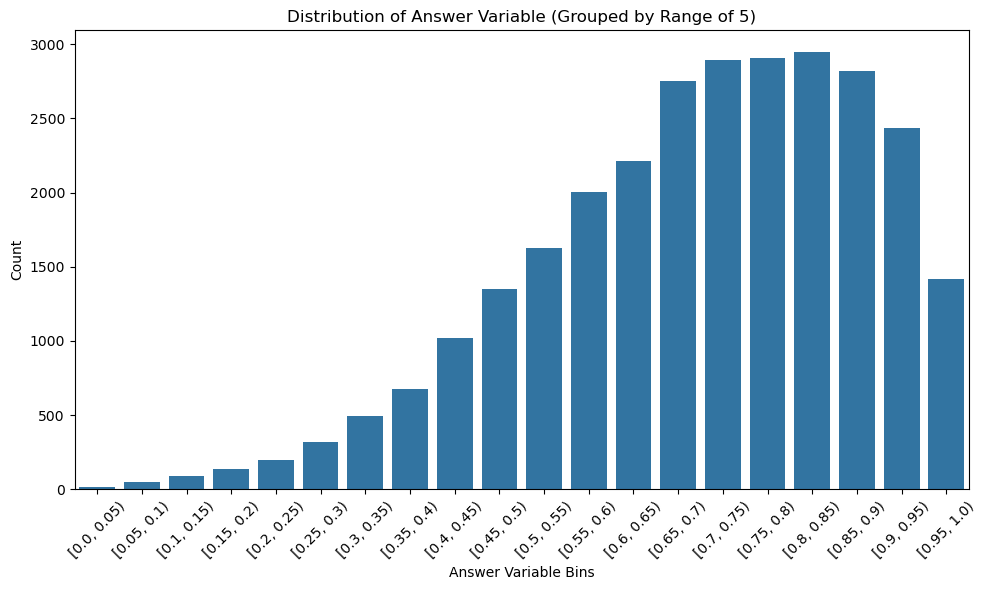

In [159]:
bins = [i / 20.0 for i in range(0, 21)]

# Create a new column 'binned_answer' with the binned data
df["binned_answer"] = pd.cut(df["energy"], bins=bins, right=False)

# Plot the distribution using countplot to show the counts for each bin
plt.figure(figsize=(10, 6))
sns.countplot(x="binned_answer", data=df)

# Customize the plot
plt.title("Distribution of Answer Variable (Grouped by Range of 5)")
plt.xlabel("Answer Variable Bins")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.tight_layout()

# Show the plot
plt.show()

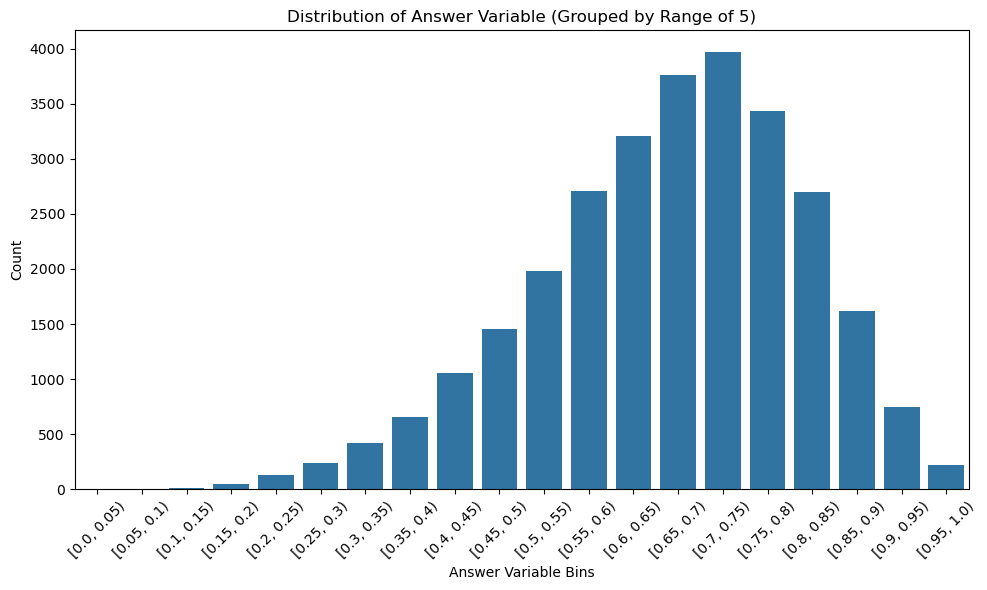

In [160]:
bins = [i / 20.0 for i in range(0, 21)]

# Create a new column 'binned_answer' with the binned data
df["binned_answer"] = pd.cut(df["danceability"], bins=bins, right=False)

# Plot the distribution using countplot to show the counts for each bin
plt.figure(figsize=(10, 6))
sns.countplot(x="binned_answer", data=df)

# Customize the plot
plt.title("Distribution of Answer Variable (Grouped by Range of 5)")
plt.xlabel("Answer Variable Bins")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

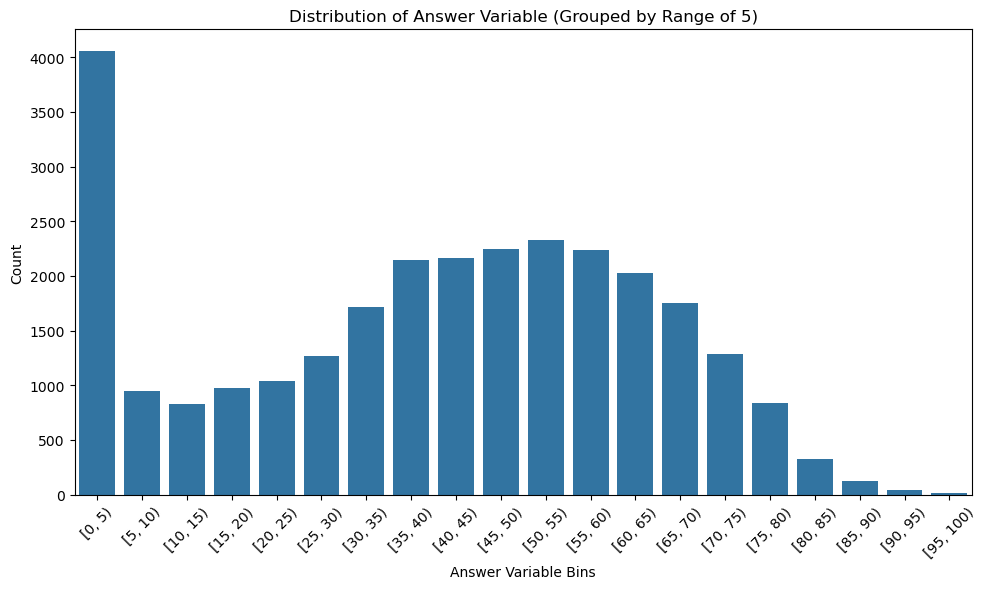

In [161]:
bins = list(range(0, 105, 5))  # Bins from 0 to 100 (inclusive)

# Create a new column 'binned_answer' with the binned data
df["binned_answer"] = pd.cut(df["track_popularity"], bins=bins, right=False)

# Plot the distribution using countplot to show the counts for each bin
plt.figure(figsize=(10, 6))
sns.countplot(x="binned_answer", data=df)

# Customize the plot
plt.title("Distribution of Answer Variable (Grouped by Range of 5)")
plt.xlabel("Answer Variable Bins")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.tight_layout()

# Show the plot
plt.show()

### Checking for correlation

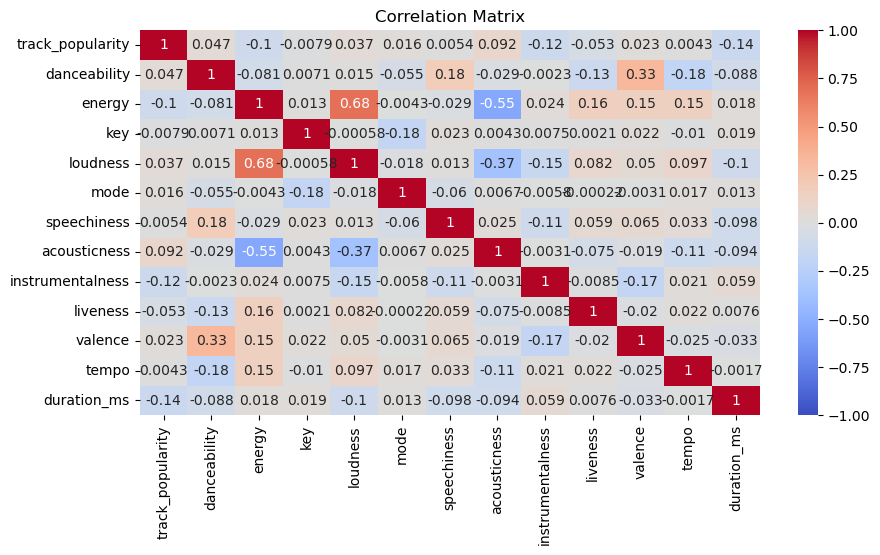

In [162]:
# Calculate the correlation matrix
numeric_df = df.select_dtypes(include=["float64", "int64"])

correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Dealing with non-numerical data

## One hot encoding the playlist genre

We will start by one hot encoding the `playlist_genre`, as this is a non-numerical column in the dataset. We will then drop the original column and add the one hot encoded column to the dataset. For data where the `playlist_genre` is an aggregation of multiple genres resulting from the duplicates preprocessing, the vectors will simply have 1's in all the categories that are present in the genre list (i.e. the vectors aren't necessarily zeros with a single 1 entry).

Note: We notice that some subgenres overlap with genres, which can thus get confusing in the dataset if we also one-hot encode the `playlist_subgenre`. Furthermore, some subgenres are also composed of multiple subgenres in a different manner as the concatenation we did in the previous preprocessing, which pose a new syntax challenge. For simplicity, we thus decided to not one-hot encode the `playlist_subgenre` for now, and hypothesize that the playlist genre will be of sufficient influence in the prediction to keep the subgenre as is. The code for the one-hot encoding of the `playlist_subgenre` is still present in the code below, but commented out.

In [163]:
df['playlist_genre_split'] = df['playlist_genre'].apply(lambda x: x.split(', '))

all_genres = set([genre for sublist in df['playlist_genre_split'] for genre in sublist])
for genre in all_genres:
    df[genre] = df['playlist_genre_split'].apply(lambda x: x.count(genre))

df = df.drop('playlist_genre', axis=1)
df = df.drop('playlist_genre_split', axis=1)

# df['playlist_subgenre_split'] = df['playlist_subgenre'].apply(lambda x: x.split(', '))

# all_subgenres = set([subgenre for sublist in df['playlist_subgenre_split'] for subgenre in sublist])
# for subgenre in all_subgenres:
#     df[subgenre] = df['playlist_subgenre_split'].apply(lambda x: x.count(subgenre))

# df = df.drop('playlist_subgenre_split', axis=1)
# df = df.drop('playlist_subgenre', axis=1)

In the following printed data, we can see that the `playlist_genre` has been one-hot encoded with data entries possibly having multiple 1's in the vector for playlist genre. 

In [164]:
print(df.iloc[21:31, 23:29])

    rap  r&b
21    0    0
22    1    1
23    1    0
24    0    0
25    0    1
26    0    0
27    0    0
28    0    0
29    0    0
30    0    0


## Target encoding the track artist name, the playlist id and the album's id

Let us now apply **target encoding** to the `track_artist` column based on the average `track_popularity` for each artist. This will allow us to encode the `track_artist` column to represent the average popularity of each artist's tracks, which can be useful to provide here an equivalent of a numerical encoding of artist popularity.

In [165]:
# Step 1: Calculate the mean target value for each 'track_artist'
mean_encoded_artist_track = df.groupby("track_artist")["track_popularity"].mean()

# Step 2: Map the mean target value back to the original DataFrame
df["artist_track_encoded"] = df["track_artist"].map(mean_encoded_artist_track)

# Display the updated DataFrame with the new encoded column
print(df[["track_artist", "artist_track_encoded"]].head())

         track_artist  artist_track_encoded
0     Barbie's Cradle                  43.5
1                RIKA                  15.0
2       Steady Rollin                  29.5
3  The.madpix.project                  12.2
4         YOSA & TAAR                  38.0


We do the same thing for the `playlist_id` column.

In [166]:
mean_encoded_playlist = df.groupby("playlist_id")["track_popularity"].mean()
df["playlist_id_encoded"] = df["playlist_id"].map(mean_encoded_playlist)
print(df[["playlist_id", "playlist_id_encoded"]].head())

              playlist_id  playlist_id_encoded
0  37i9dQZF1DWYDQ8wBxd7xt            43.100000
1  0JmBB9HfrzDiZoPVRdv8ns            26.206186
2  3YouF0u7waJnolytf9JCXf            31.697917
3  5TiiHps0hNCyQ6ijVkNZQs            39.436364
4  37i9dQZF1DXdOtZGKonFlM            35.673469


We do the same thing for the `track_album_name` columns.

In [167]:
mean_encoded_album = df.groupby("track_album_id")["track_popularity"].mean()
df["track_album_id_encoded"] = df["track_album_id"].map(mean_encoded_album)
print(df[["track_album_id", "track_album_id_encoded"]].head())

           track_album_id  track_album_id_encoded
0  1srJQ0njEQgd8w4XSqI4JQ                    41.0
1  1ficfUnZMaY1QkNp15Slzm                    15.0
2  3z04Lb9Dsilqw68SHt6jLB                    28.0
3  1Z4ANBVuhTlS6DprlP0m1q                    24.0
4  2BuYm9UcKvI0ydXs5JKwt0                    38.0


## Converting the track album release date to a numerical value

Let us now convert the `track_album_release_date` column into a proper datetime format using `pd.to_datetime()`, extracting the year, month, and day components into separate columns: `release_year`, `release_month`, and `release_day`, respectively. These new columns allow for easier analysis based on the album release date, which can be useful for time-based trends or patterns in the dataset.

In [168]:
df["track_album_release_date"] = pd.to_datetime(df["track_album_release_date"], errors="coerce")

df["release_year"] = df["track_album_release_date"].dt.year

df["release_month"] = df["track_album_release_date"].dt.month

df["release_day"] = df["track_album_release_date"].dt.day

**Save pre-processed data in a new csv file**

In [169]:
# Save pre-processed data to a CSV file
df.to_csv(OUTPUT_PATH, index=False)